In [1]:
library(tidyverse)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.4.4     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.0
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


In [2]:
library(ggpubr)
library(ggplot2)

In [3]:
library(DT)

In [4]:
tumor_ms <- read.table('/disk1/pengweixing/esophageal/15.MS/data_ms_rmdup_tumor.txt',header=T)

In [5]:
colnames(tumor_ms) %>% str_replace('X','') -> colnames(tumor_ms)

In [6]:
her2_ms <- tumor_ms['ERBB2',]

In [7]:
her2_ms

,9DW0001,9DW0014,9DW0002,9DW0003,9DW0008,9DW0068,9DW0071,9DW0073,9DW0074,9DW0075,⋯,9DW0270,9DW0271,9DW0372,9DW0373,9DW0374,9DW0377,9DW0400,9DW0403,9DW0404,9DW0408
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
ERBB2,0.895,1.12,1.039,0.832,2.966,1.022,3.915,1.224,1.056,1.03,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA


In [8]:
data <- readRDS('../00.data/Tumor.tpm.Rdata')

In [9]:
her2_RNA <- data['ERBB2',]

In [43]:
her2_RNA %>% t()%>% as.data.frame() %>% saveRDS(object = .,file = "/disk1/pengweixing/esophageal/12.RNAseq_hg38/HER2_box_for_alltumor/GCA_her2_RNA.Rdata")

In [10]:
saveRDS(object = her2_RNA,file = "GCA_her2_RNA.Rdata")

In [14]:
phe <- readRDS('/disk1/pengweixing/esophageal/12.RNAseq_hg38/00.data/phe_RNA54.Rdata')

In [15]:
colnames(data) %>% str_replace('X','') -> colnames(data)

In [16]:
phe$sample %>% intersect(colnames(data)) -> isct_names

In [17]:
her2_ms_54 <- her2_ms[,isct_names]

In [18]:
her2_RNA_54 <- her2_RNA[,isct_names]

In [19]:
her2_ms_54[is.na(her2_ms_54)] = 0

In [20]:
combined <- t(rbind(her2_ms_54,her2_RNA_54))

In [21]:
colnames(combined) <- c("ERBB2_MS","ERBB2_RNA")

In [22]:
openxlsx::write.xlsx(as.data.frame(combined), file = "Corr_MS_RNAseq_HER2/ERBB2_MS_RNAseq_exp.xlsx",rowNames=T)

Warning message in file.create(to[okay]):
“cannot create file 'Corr_MS_RNAseq_HER2/ERBB2_MS_RNAseq_exp.xlsx', reason 'No such file or directory'”


In [23]:
her2_ms_54[is.na(her2_ms_54)] = 0

In [24]:
her2_ms_54 <- as.numeric(her2_ms_54)
her2_RNA_54 <- as.numeric(her2_RNA_54)

In [25]:
cor(her2_ms_54,as.numeric(her2_RNA_54),method="spearman")

[1] 0.5643249

In [39]:
cor(her2_ms_54,as.numeric(her2_RNA_54))

[1] 0.7559239

### correlation between HER2 RNA and HER2 MS

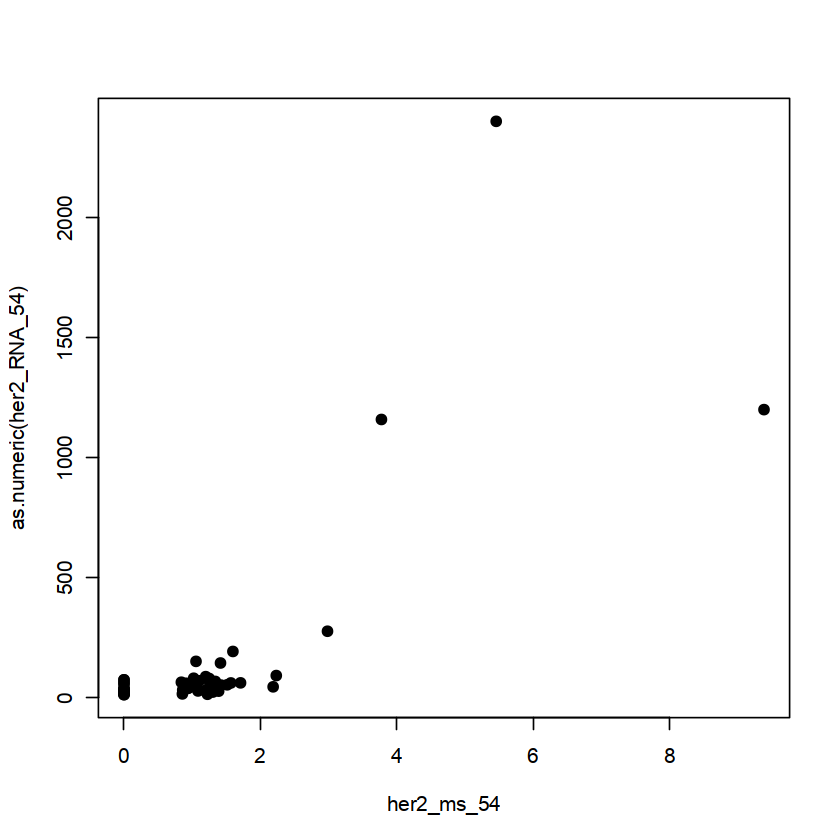

In [31]:
#pdf(file="Corr_MS_RNAseq_HER2/HER2_MS_RNAseq.pdf",height = 6,width=6)
plot(her2_ms_54,as.numeric(her2_RNA_54), pch=19)
#dev.off()

In [29]:
temp <- data.frame(MS=log2(her2_ms_54+1),RNA=log2(as.numeric(her2_RNA_54)))

In [38]:
pdf(file="HER2_MS_RNAseq.pdf",height = 6,width=6)
plot(temp$MS,temp$RNA, pch=19,xlab = "MS_abundance",ylab = "RNA_tpm / log2")
dev.off()

png 
  2

`geom_smooth()` using formula = 'y ~ x'


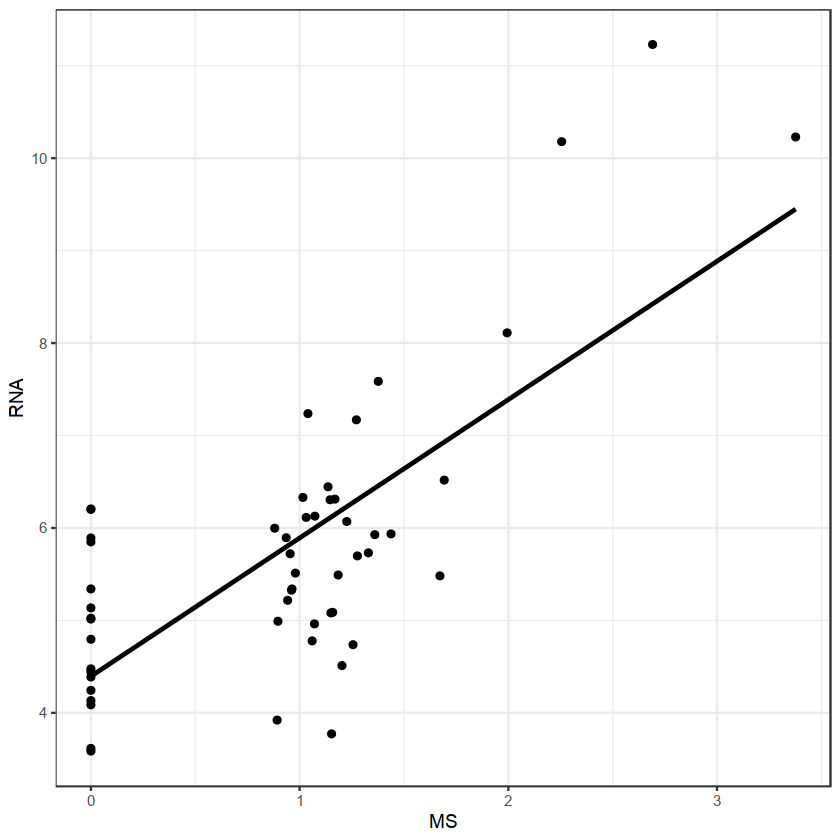

In [30]:
ggplot(data=temp, aes(x=MS, y=RNA)) + geom_point()+  stat_smooth(method="lm",color="black", se=FALSE) +theme_bw()

In [164]:
pdf(file="Corr_MS_RNAseq_HER2/HER2_MS_RNAseq.log2.pdf",height = 6,width=6)
plot(log2(her2_ms_54+1),log2(as.numeric(her2_RNA_54)),pch=19)
dev.off()

png 
  2

In [8]:
phe2 <- phe[isct_names,]

In [20]:
head(her2_ms_54)

,9DW0068,9DW0073,9DW0074,9DW0079,9DW0076,9DW0085,9DW0092,9DW0126,9DW0154,9DW0169,⋯,9DW0109,9DW0110,9DW0117,9DW0123,9DW0125,9DW0250,9DW0251,9DW0261,9DW0262,9DW0377
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
ERBB2,1.022,1.224,1.056,2.233,1.198,0.856,0.841,1.567,0.861,2.187,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA


In [14]:
phe2 %>% filter(group=='High') %>% select(sample) %>% .[,1] -> high_names
phe2 %>% filter(group=='Low') %>% select(sample) %>% .[,1] -> low_names
phe2 %>% filter(group=='negative') %>% select(sample) %>% .[,1] -> neg_names

In [10]:
high_names

[1] "9DW0073" "9DW0079" "9DW0076" "9DW0126" "9DW0169" "9DW0192" "9DW0193"
 [8] "9DW0201" "9DW0219" "9DW0227" "9DW0230" "9DW0274" "9DW0312" "9DW0330"
[15] "9DW0344" "9DW0351" "9DW0362" "9DW0368" "9DW0383"

In [162]:
data <- data[,c(high_names,low_names,neg_names)]

In [192]:
data2 <- log2(data)

In [193]:
data_high <- data2[,high_names]
data_low <- data2[,low_names]
data_neg <- data2[,neg_names]

In [211]:
get_cor <- function(data_in){
    ERBB2 <- data_in['ERBB2',]
    ERBB2 <- as.numeric(ERBB2)
    rlt <- as.data.frame(matrix(data = 0,nrow = nrow(data_in),ncol = 1))
    rownames(rlt) <- rownames(data_in)
    colnames(rlt) <- 'Corr'
    for(i in 1:nrow(data_in)){
        temp = as.numeric(data_in[i,])
        rlt[i,1] = cor(ERBB2,temp)
    }
    rlt2 <- rlt %>% arrange(desc(Corr))
    return(rlt2)
}

In [1]:
cor(c(1,2,3,4,5),c(1,2,3,4,5))

[1] 1

In [212]:
rlt <- get_cor(data2)

In [213]:
rlt_high <- get_cor(data_high)

In [214]:
rlt_low <- get_cor(data_low)

In [215]:
rlt_neg <- get_cor(data_neg)

In [216]:
rlt_high2 <- rlt_high[rownames(rlt),,drop=FALSE] 

In [217]:
rlt_low2 <- rlt_low[rownames(rlt),,drop=FALSE] 

In [218]:
rlt_neg2 <- rlt_neg[rownames(rlt),,drop=FALSE] 

In [219]:
ERBB2_coexp <- cbind(rlt,rlt_high2,rlt_low2,rlt_neg2)

In [220]:
colnames(ERBB2_coexp) <- c("all",'high','low','neg')

In [ ]:
ERBB2_coexp

In [222]:
openxlsx::write.xlsx(ERBB2_coexp, file = "03.data_matrix/ERBB2_Coamp.log2.xlsx",rowNames = TRUE)

In [157]:
data_high[c('CHRNE','HJV','ERBB2'),] %>% t() -> a

In [158]:
data_low[c('CHRNE','HJV','ERBB2'),] %>% t() -> b

In [159]:
data_neg[c('CHRNE','HJV','ERBB2'),] %>% t() -> c

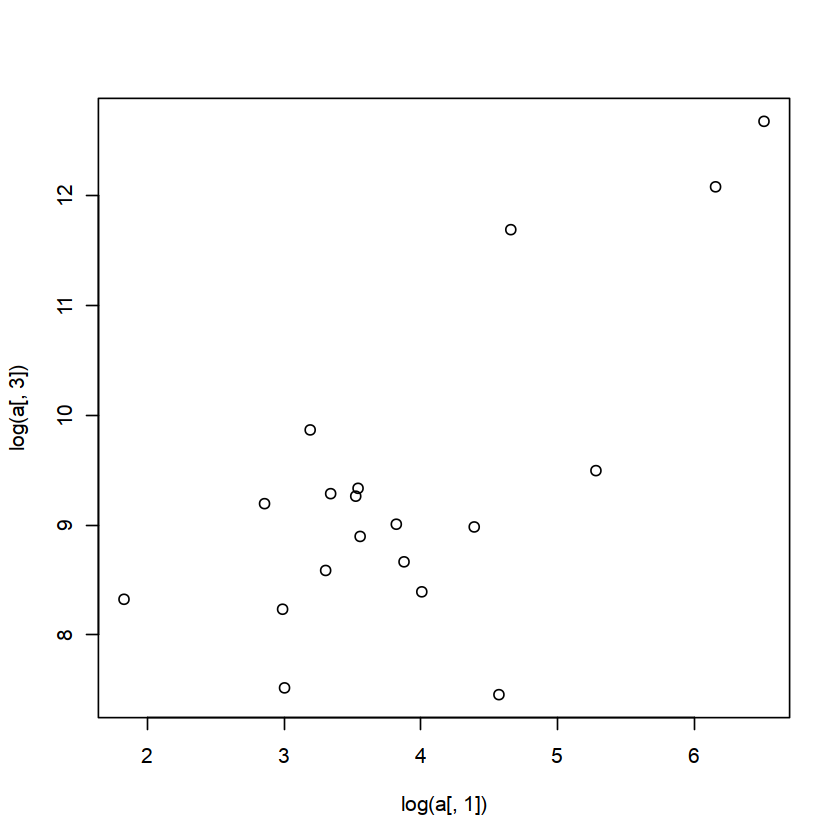

In [191]:
plot(log(a[,1]),log(a[,3]))

In [190]:
cor(log(a[,1]),log(a[,3]))

[1] 0.7055681

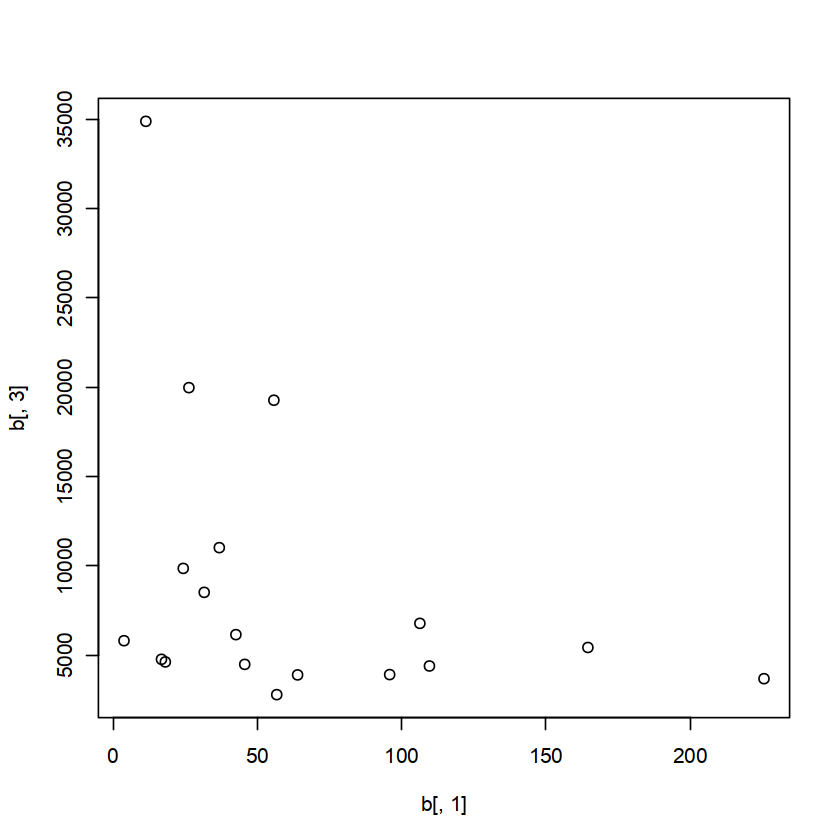

In [173]:
plot(b[,1],b[,3])

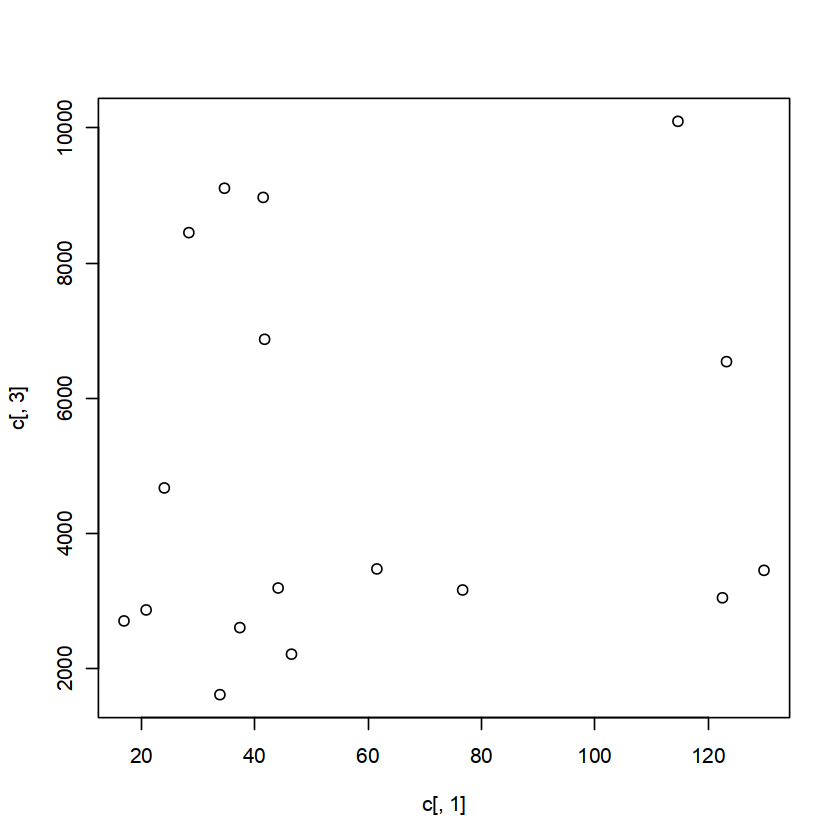

In [174]:
plot(c[,1],c[,3])

In [2]:
a = c('a','b','a','c','b')

In [5]:
duplicated(a)

[1] FALSE FALSE  TRUE FALSE  TRUE

In [4]:
-duplicated(a)

[1]  0  0 -1  0 -1

In [7]:
a[c(0,-1)]

[1] "b" "a" "c" "b"

In [ ]:
a[c]